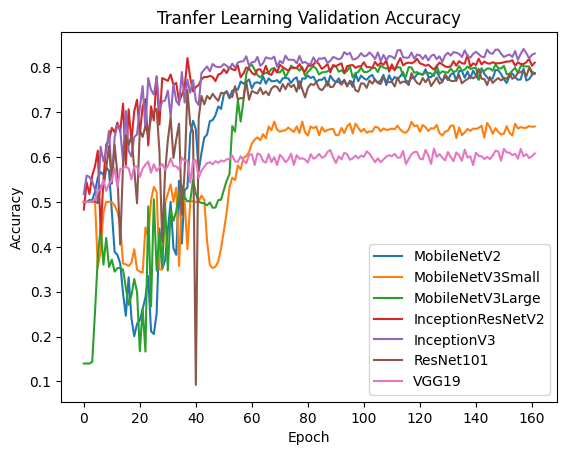

In [3]:
import json
import matplotlib.pyplot as plt

modelNames = ["MobileNetV2", "MobileNetV3Small", "MobileNetV3Large", "InceptionResNetV2", "InceptionV3", "ResNet101", "VGG19"]

data = []
# import the JSON files
for modelName in modelNames:
		f = open ('completed/training-results/' + modelName + '.json', "r")
		data.append(json.loads(f.read()))

# Plot the graph using ['accuracy'] and ['val_accuracy']

for d in data:
		plt.plot(d['val_accuracy'], label=d['BaseModelName'])

plt.title('Tranfer Learning Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()



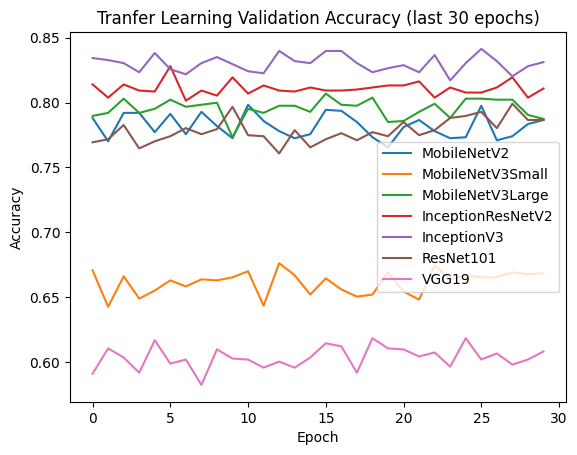

In [4]:
# Plot the last 30 epochs
for d in data:
		plt.plot(d['val_accuracy'][-30:], label=d['BaseModelName'])

plt.title('Tranfer Learning Validation Accuracy (last 30 epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [5]:
# print the highest validation accuracy and the lowest validation loss for each model
for d in data:
		print(d['BaseModelName'])
		print('Maximum validation accuracy:\t\t', max(d['val_accuracy']))
		print('Minimum validation loss:\t\t', min(d['val_loss']))
		print('')

MobileNetV2
Maximum validation accuracy:		 0.798279881477356
Minimum validation loss:		 0.34492427110671997

MobileNetV3Small
Maximum validation accuracy:		 0.6794370412826538
Minimum validation loss:		 0.4207272231578827

MobileNetV3Large
Maximum validation accuracy:		 0.8068803548812866
Minimum validation loss:		 0.39962688088417053

InceptionResNetV2
Maximum validation accuracy:		 0.8279905915260315
Minimum validation loss:		 0.36184900999069214

InceptionV3
Maximum validation accuracy:		 0.8412822484970093
Minimum validation loss:		 0.30614280700683594

ResNet101
Maximum validation accuracy:		 0.7990617752075195
Minimum validation loss:		 0.3056398630142212

VGG19
Maximum validation accuracy:		 0.6192337870597839
Minimum validation loss:		 0.3742518424987793



[('InceptionResNetV2', 865), ('MobileNetV3Small', 181), ('MobileNetV2', 398), ('InceptionV3', 557), ('MobileNetV3Large', 315), ('ResNet101', 1086), ('VGG19', 377)]


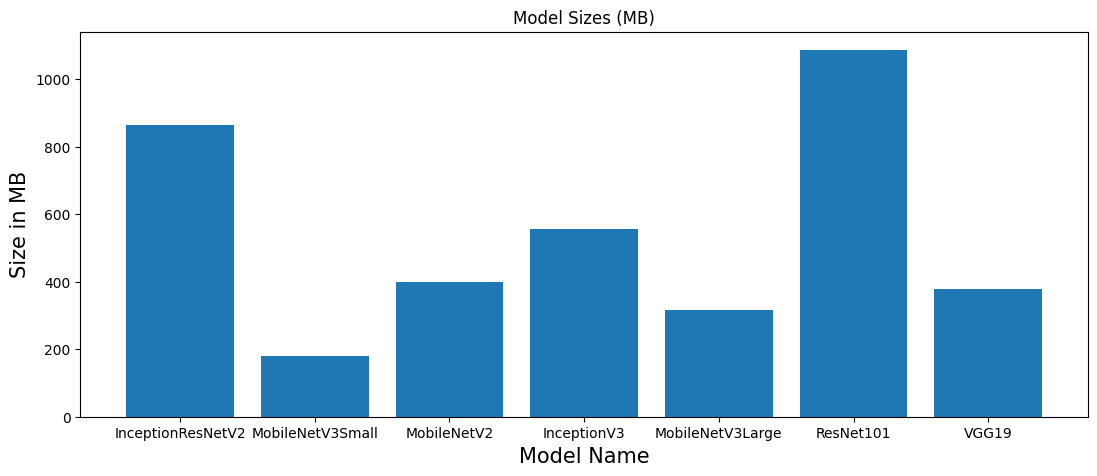

In [22]:
# Here I'll create an array with all the sizes of the completed models

import os
import matplotlib.pyplot as plt

# Credits to https://note.nkmk.me/en/python-os-path-getsize/
def get_dir_size(path='.'):
    total = 0
    with os.scandir(path) as it:
        for entry in it:
            if entry.is_file():
                total += entry.stat().st_size
            elif entry.is_dir():
                total += get_dir_size(entry.path)
    return total

pathToModels = './completed/completed-models'
# Lists all the files in the directory
entries = os.listdir(pathToModels)

# Create an array with all the sizes of the completed models
sizes = []

for entry in entries:
		sizes.append((entry, round(get_dir_size('./completed/completed-models/'+entry)/1024/1024)))

print(sizes)

# Graph the sizes of the models
plt.figure(figsize=(13, 5))
plt.bar([x[0] for x in sizes], [x[1] for x in sizes])
plt.title('Model Sizes (MB)', fontsize=15)

plt.ylabel('Size in MB', fontsize=12)
plt.xlabel('Model Name', fontsize=12)
plt.show()